<a href="https://colab.research.google.com/github/LucaEihol/2022_ML_Earth_Env_Sci/blob/main/eiholzer_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# IMPORT DATA
# from https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a

# libraries for the files in google drive
import pandas as pd
from pydrive.auth import GoogleAuth
from google.colab import drive
from google.colab import auth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1tI22Cvm-JguSNshHZETK1lHMNqJSRZJ8'

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")
df

,x,y,GSS,DEM,slope,planCurv,profCurv,distRoad,landCover,TWI,geology
0,567895.500000,200099.500000,1,437.746155,8.737924,-0.000748,0.012272,145.000000,21,7.799716,24
1,568095.500000,200079.500000,1,451.840485,10.511221,0.039531,-0.080413,5.000000,11,4.903382,24
2,567905.500000,200044.500000,1,459.606934,23.602930,0.020892,-0.144569,98.994949,15,4.046845,24
3,567950.500000,200029.500000,1,458.156433,13.160677,0.040629,-0.046540,56.568542,15,5.365241,24
4,567800.500000,199999.500000,1,460.311768,20.403830,-0.005813,-0.020053,138.654251,21,5.817281,24
...,...,...,...,...,...,...,...,...,...,...,...
5183,504484.087501,137698.968362,0,451.893799,1.660977,-0.005359,0.001711,241.298569,21,12.846220,1
5184,580143.787262,142740.539689,0,2197.191650,25.800716,0.093662,-0.004219,1674.820923,51,3.945750,7
5185,553053.194988,169380.971392,0,628.142700,37.131775,-0.026372,0.002024,189.274933,41,4.883382,1
5186,569245.739605,192078.008331,0,445.515076,0.898599,0.003541,-0.002232,98.615417,15,9.319879,9


# Variables


DEM: elevation [mamsl]

slope:  slope [°]

planCurv: the rate of change of aspect along contour [1/m]

profCurv: the rate of change of slope down a line [1/m]

distRoad: istance to communication routes [m]

landCover: land cover information (7 categories)

TWI: Topographic Wetness Index

geology: lithologies (9 categories)

In [ ]:
# PREPROCESSING
# Dividing dependent variable from predictor variables (also divided in numerical and categorical)
y = df['GSS']
x_num = df.drop(['GSS','x','y','landCover','geology'], axis=1)
x_cat = df[['landCover','geology']]

# One Hot Encoding
# from https://www.ritchieng.com/machinelearning-one-hot-encoding/
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(x_cat)
onehotlabels = enc.transform(x_cat).toarray()
onehotlabels.shape

# Merge
x_num.columns
x = np.concatenate((x_num, onehotlabels), axis=1)
col_name = ['DEM', 'slope', 'planCurv', 'profCurv', 'distRoad', 'TWI','lc_cat1','lc_cat2','lc_cat3','lc_cat4','lc_cat5','lc_cat6','lc_cat7','lith_cat1','lith_cat2','lith_cat3','lith_cat4','lith_cat5','lith_cat6','lith_cat7','lith_cat8','lith_cat9']
x = pd.DataFrame(x, columns=col_name)
x

,DEM,slope,planCurv,profCurv,distRoad,TWI,lc_cat1,lc_cat2,lc_cat3,lc_cat4,...,lc_cat7,lith_cat1,lith_cat2,lith_cat3,lith_cat4,lith_cat5,lith_cat6,lith_cat7,lith_cat8,lith_cat9
0,437.746155,8.737924,-0.000748,0.012272,145.000000,7.799716,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,451.840485,10.511221,0.039531,-0.080413,5.000000,4.903382,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,459.606934,23.602930,0.020892,-0.144569,98.994949,4.046845,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,458.156433,13.160677,0.040629,-0.046540,56.568542,5.365241,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,460.311768,20.403830,-0.005813,-0.020053,138.654251,5.817281,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5183,451.893799,1.660977,-0.005359,0.001711,241.298569,12.846220,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5184,2197.191650,25.800716,0.093662,-0.004219,1674.820923,3.945750,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5185,628.142700,37.131775,-0.026372,0.002024,189.274933,4.883382,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5186,445.515076,0.898599,0.003541,-0.002232,98.615417,9.319879,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split train and test
import numpy as n
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=rnd_seed)

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
# sarebbe barare, mondo che conosci
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=col_name)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=col_name)

Accuracy: 0.8114419147694104
RMSE: 0.43423275467264055
Confusion matrix: [[657 187]
 [136 733]]


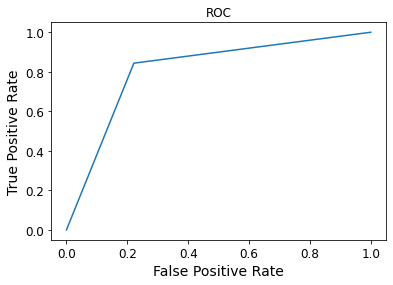

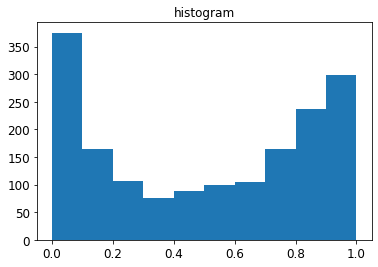

In [ ]:
# Support Vector Machines
from sklearn import svm
sv = svm.SVC(probability=True)
sv.fit(X_train, y_train)
y_pred_sv = sv.predict(X_test)

# Accuracy, RMSE and confusion matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sv))
print("RMSE:",metrics.mean_squared_error(y_test, y_pred_sv, squared=False))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred_sv))

# ROC curve
fpr_sv, tpr_sv, _ = metrics.roc_curve(y_test,  y_pred_sv)
plt.plot(fpr_sv,tpr_sv)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC") 
plt.show()

# presence of landslide probabilities
prob_sv = sv.predict_proba(X_test)
prob_sv = prob_sv[:,1]
import matplotlib.pyplot as plt
plt.hist(prob_sv, bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]) 
plt.title("histogram") 
plt.show()

Accuracy: 0.835960303561004
RMSE: 0.4050181433454505
Confusion matrix: [[683 161]
 [120 749]]


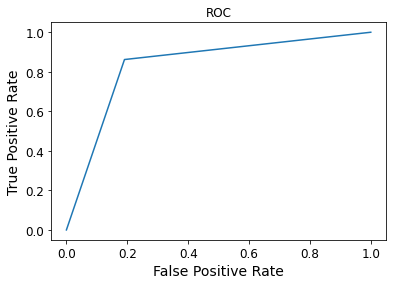

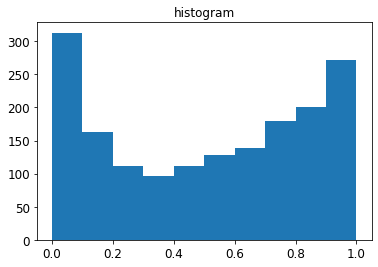

In [ ]:
# Random forest
#from https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy, RMSE and confusion matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("RMSE:",metrics.mean_squared_error(y_test, y_pred_rf, squared=False))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred_rf))

# ROC curve
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf)
plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC") 
plt.show()

# presence of landslide probabilities
prob_rf = rf.predict_proba(X_test)
prob_rf = prob_rf[:,1]
import matplotlib.pyplot as plt
plt.hist(prob_rf, bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]) 
plt.title("histogram") 
plt.show()

In [ ]:
# Hyperparameter research
# from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 475, stop = 515, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 3, 4, 5, 6] # around the square root of the number of the variables (22)

random_grid = {'n_estimators': n_estimators,'max_features': max_features}

pprint(random_grid)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

{'max_features': ['auto', 'sqrt', 3, 4, 5, 6],
 'n_estimators': [475,
                  476,
                  478,
                  480,
                  481,
                  483,
                  485,
                  486,
                  488,
                  490,
                  491,
                  493,
                  495,
                  496,
                  498,
                  500,
                  501,
                  503,
                  505,
                  506,
                  508,
                  510,
                  511,
                  513,
                  515]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_features': 'sqrt', 'n_estimators': 488}

#First result

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'max_features': 4, 'n_estimators': 495}

I took the closest numbers to the best n_estimators and i repeted the research, always with 25 numbers

#Final result

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'max_features': 'auto', 'n_estimators': 490}

N.B. this is an example and it changes every time you run the entire code

Accuracy: 0.8423817863397548
RMSE: 0.39701160393651613
Confusion matrix: [[688 156]
 [114 755]]


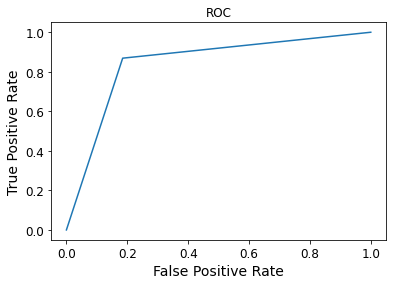

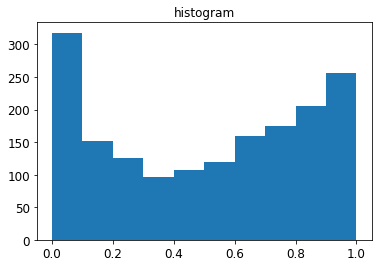

In [ ]:
# Optimized Random forest
rfo = RandomForestClassifier(n_estimators=488, max_features='sqrt') # change the hyperparameters every time you run the entire code
rfo.fit(X_train, y_train)
y_pred_rfo = rfo.predict(X_test)

# Accuracy, RMSE and confusion matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfo))
print("RMSE:",metrics.mean_squared_error(y_test, y_pred_rfo, squared=False))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred_rfo))

# ROC curve
fpr_rfo, tpr_rfo, _ = metrics.roc_curve(y_test,  y_pred_rfo)
plt.plot(fpr_rfo,tpr_rfo)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC") 
plt.show()

# presence of landslide probabilities
prob_rfo = rfo.predict_proba(X_test)
prob_rfo = prob_rfo[:,1]
import matplotlib.pyplot as plt
plt.hist(prob_rfo, bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]) 
plt.title("histogram") 
plt.show()

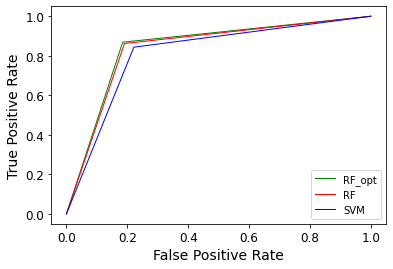

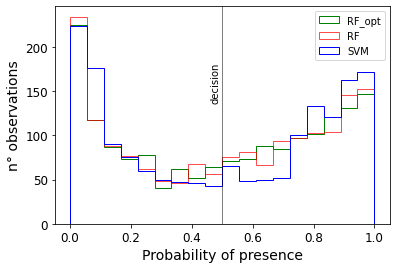

In [ ]:
# Comparative plots
# ROCs
plt.plot(fpr_rfo,tpr_rfo, label='RF_opt', color='green', linewidth=1)
plt.plot(fpr_rf,tpr_rf, label='RF', color='red', linewidth=1)
plt.plot(fpr_sv,tpr_sv, label='SVM', color='blue', linewidth=1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.title("ROCs")
plt.legend(loc='lower right')
plt.show()

# presence of landslide probabilities
import matplotlib.pyplot as plt
bins = np.linspace(0, 1, 19)
plt.hist(prob_rfo, bins, bottom=0, linewidth=1, histtype='stepfilled', label='RF_opt', edgecolor='green', facecolor='none')
plt.hist(prob_rf, bins, bottom=0, linewidth=1, histtype='stepfilled', label='RF', edgecolor='red', facecolor='none', alpha=0.7)
plt.hist(prob_sv, bins, bottom=0, linewidth=1, histtype='stepfilled', label='SVM', edgecolor='blue', facecolor='none')
plt.axvline(x=0.5, color='black', linewidth=0.5)
plt.text(0.46, 160, "decision", rotation=90, verticalalignment='center')
plt.ylabel('n° observations')
plt.xlabel('Probability of presence')
# plt.title("Presence of landslide probabilities") 
plt.legend(loc='upper right')
plt.show()